TODO: 

* ~~number of articles (number of ideas present)~~
* create FLN 
    - degree distribution (how connected ideas are?)
    - list of invalid first links 
    - accumulation (what's the most important idea), cycles (groups of ideas), and influence (most influential idea)
    

In [1]:
import pandas as pd
from scipy import stats 
import numpy as np
import json

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import defaultdict

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#load word with years json

with open("data/words_with_years.json") as dw:
    word_years_dict = json.load(dw)
    #default dict value of 2015
    word_years_dict = defaultdict(lambda: 2015, word_years_dict)
    

In [3]:
#load Wikipedia First Link Network 

#change to appropriate path
results_path = "/Users/mark/Desktop/wiki_v4/" 

with open(results_path + "fln.json") as f:
    fln_dict = json.load(f)
fln_df = pd.DataFrame.from_dict(fln_dict, orient='index')
fln_df.index.name = 'article'
fln_df.columns = ['first link']
fln_df = fln_df.reset_index()

In [4]:
def get_article_year(title):
    """
    returns the earliest year
    the article could have appeared
    by computing the latest first 
    appearance of the words in the title
    """
    years = []
    for word in title.split():
        years.append(word_years_dict[word.lower().strip("()")])
    years.sort()
    if years:
        return years[-1]
    else:
        return 2015

In [5]:
#apply function to dataframe (runtime ~3 min)
fln_df['year'] = fln_df['article'].apply(get_article_year)

## Number of articles 
a proxy for the evolution of the number of ideas through time

In [23]:
centuries = range(1000, 2100, 100)
number_of_articles = []

for century in centuries:
    number_of_articles.append(fln_df[fln_df['year'] < century].shape[0])
    
print(number_of_articles)

[4831, 4846, 7862, 57181, 223855, 338295, 600318, 842167, 975114, 1352947, 1561524]


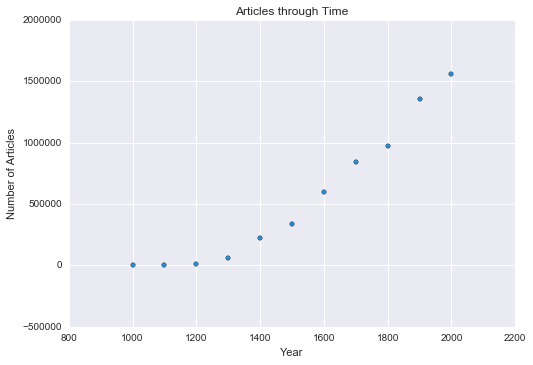

In [24]:
plt.scatter(centuries, number_of_articles, c="#268bd2")
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.title("Articles through Time")

In [38]:
print number_of_articles

[4834, 4849, 7865, 57184, 223858, 338298, 600321, 842172, 975123, 1352958, 1561537]


**By decade**

In [39]:
decades = range(1800, 2010, 10)

num_articles_by_decade = []

for decade in decades:
    num_articles_by_decade.append(fln_df[fln_df['year'] < decade].shape[0])
    

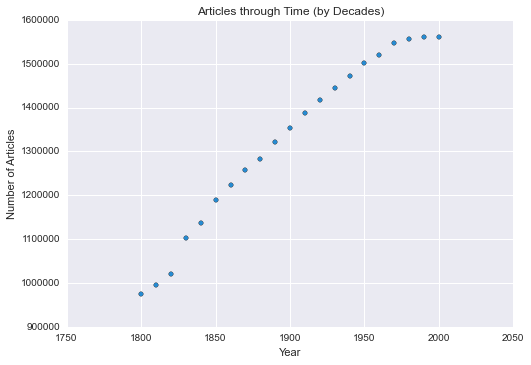

In [40]:
plt.scatter(decades, num_articles_by_decade, c="#268bd2")
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.title("Articles through Time (by Decades)")

## Degree Distribution and Invalid Links
how connected and disconnected are ideas?

## Where do references accumulate?
how does the main anchor for our ideas change through time?

In [6]:
# for viz, give fletcher dictionary (stored as json)

from net_metrics import net_metrics

In [7]:
#get dictionary with node --> link

def build_network(year):
    """
    returns a network object metrics as attributes
    """
    net_data = fln_df[fln_df['year'] < year]
    net_dict = net_data.set_index('article')['first link'].to_dict()
    net = net_metrics.Network(net_dict)
    return net


In [9]:
net = build_network(1800)

In [10]:
net.traversal_visits

defaultdict(int,
            {'Angel on My Shoulder (film)': 2,
             'Mount Hunter (Alaska)': 1,
             'Deutsche Post': 1,
             'Fitness landscape': 2,
             'Trump Ocean Club International Hotel and Tower': 1,
             'Postmodern philosophy': 2,
             'The Adventures of Sharkboy and Lavagirl in 3-D': 3,
             'North Carolina National Bank': 1,
             'Enicocephalidae': 2,
             'Emergency Banking Act': 4,
             'non-commissioned officer': 43,
             'Ware F.C.': 1,
             'National Wildlife Refuge System': 7,
             'Victory Day': 2,
             'South_Devon_Railway_Eagle_class#Cornwall_Railway': 1,
             'Black Colonel': 1,
             'Schutzmannschaft-Brigade Siegling': 1,
             'Suction pressure': 1,
             'Culture of Cambodia': 1,
             'MPEG': 2,
             'Charmed (season 3)#ep46': 3,
             'Official': 14,
             'Charmed (season 3)#ep47': 3,
    

In [11]:
net.traversal_funnels

defaultdict(int,
            {'Angel on My Shoulder (film)': 2,
             'Mount Hunter (Alaska)': 1,
             'Deutsche Post': 1,
             'Fitness landscape': 2,
             'Trump Ocean Club International Hotel and Tower': 1,
             'Postmodern philosophy': 2,
             'The Adventures of Sharkboy and Lavagirl in 3-D': 3,
             'North Carolina National Bank': 1,
             'Enicocephalidae': 2,
             'Emergency Banking Act': 4,
             'non-commissioned officer': 43,
             'Ware F.C.': 1,
             'National Wildlife Refuge System': 7,
             'Victory Day': 2,
             'South_Devon_Railway_Eagle_class#Cornwall_Railway': 1,
             'Black Colonel': 1,
             'Schutzmannschaft-Brigade Siegling': 1,
             'Suction pressure': 1,
             'Culture of Cambodia': 1,
             'MPEG': 2,
             'Charmed (season 3)#ep46': 3,
             'Official': 14,
             'Charmed (season 3)#ep47': 3,
    

In [12]:
#network metrics by century (runtime ~1min)
centuries = range(1000, 2100, 100)

net_metrics_dict_century = {}

for century in centuries:
    net = build_network(century)
    net_metrics_dict_century[century] = {'visits': net.traversal_visits, 'funnels': net.traversal_funnels}


In [14]:
net_metrics_dict_century[1800]

{'funnels': defaultdict(int,
             {'Angel on My Shoulder (film)': 2,
              'Mount Hunter (Alaska)': 1,
              'Deutsche Post': 1,
              'Fitness landscape': 2,
              'Trump Ocean Club International Hotel and Tower': 1,
              'Postmodern philosophy': 2,
              'The Adventures of Sharkboy and Lavagirl in 3-D': 3,
              'North Carolina National Bank': 1,
              'Enicocephalidae': 2,
              'Emergency Banking Act': 4,
              'non-commissioned officer': 43,
              'Ware F.C.': 1,
              'National Wildlife Refuge System': 7,
              'Victory Day': 2,
              'South_Devon_Railway_Eagle_class#Cornwall_Railway': 1,
              'Black Colonel': 1,
              'Schutzmannschaft-Brigade Siegling': 1,
              'Suction pressure': 1,
              'Culture of Cambodia': 1,
              'MPEG': 2,
              'Charmed (season 3)#ep46': 3,
              'Official': 14,
             

In [17]:
#write data to json
temp_store_path = "/Users/mark/Desktop/temp_data/"
with open(temp_store_path + "net_metrics_century.json", "w") as f:
    json.dump(net_metrics_dict_century, f)

In [19]:
#again by decades (runtime ~4min)
decades = range(1000, 2020, 10)

net_metrics_dict_decade = {}

for decade in decades:
    net = build_network(decade)
    net_metrics_dict_decade[decade] = {'visits': net.traversal_visits, 'funnels': net.traversal_funnels}

#write data
with open(temp_store_path + "net_metrics_decade.json", "w") as f:
    json.dump(net_metrics_dict_decade, f)


In [29]:
for t in sorted(net.traversal_visits.items(), key=lambda x:x[1])[-10:]:
    print({"name":t[0], "value": t[1]})



{'value': 1434, 'name': 'England'}
{'value': 1529, 'name': 'American football'}
{'value': 1581, 'name': 'Christianity'}
{'value': 1598, 'name': 'Canada'}
{'value': 1606, 'name': 'Abrahamic religions'}
{'value': 1785, 'name': 'mathematics'}
{'value': 1857, 'name': 'team sport'}
{'value': 1982, 'name': 'studio album'}
{'value': 2682, 'name': 'United Kingdom'}
{'value': 6968, 'name': 'United States'}


In [34]:
#top 10 for fletcher (~runtime >8min)
decades = range(1000, 2020, 10)
net_metrics_dict_decade_top_10 = {}

for decade in decades:
    net = build_network(decade)
    net_metrics_dict_decade_top_10[decade] = {'visits': 
                                               [{'name': t[0], 'value': t[1]} for t in sorted(net.traversal_visits.items(), key=lambda x:x[1])[-10:]],
                                               'funnels': 
                                               [{'name': f[0], 'value': f[1]} for f in sorted(net.traversal_funnels.items(), key=lambda x:x[1])[-10:]]}
    
#write data
with open(temp_store_path + "net_metrics_decade_top_10.json", "w") as f:
    json.dump(net_metrics_dict_decade_top_100, f)

## Which articles most influence the shape of the network?
the organization of ideas' connections changing through time